In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sf = pd.read_csv("bigmart_data.csv")
df = pd.DataFrame(sf)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Text(0.5, 1.0, 'Distribution of Item Weight (Before Filling)')

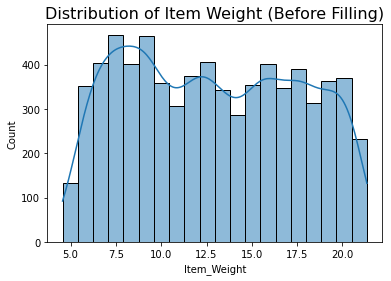

In [5]:

df.isnull().sum()
# df.info()
# df.duplicated().sum()
sns.histplot(df['Item_Weight'].dropna(),kde=True)
plt.title('Distribution of Item Weight (Before Filling)', fontsize=16)


Text(0.5, 1.0, 'distribution of Outlet Size (Before Filling)')

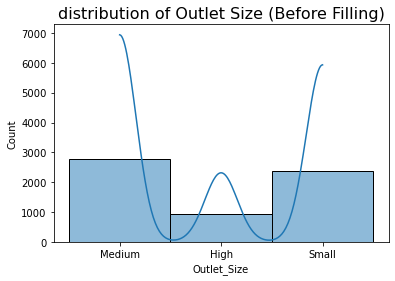

In [6]:
sns.histplot(df["Outlet_Size"].dropna(),kde=True)
plt.title("distribution of Outlet Size (Before Filling)", fontsize=16)

Text(0.5, 1.0, 'Distribution of Item Weight (After Filling)')

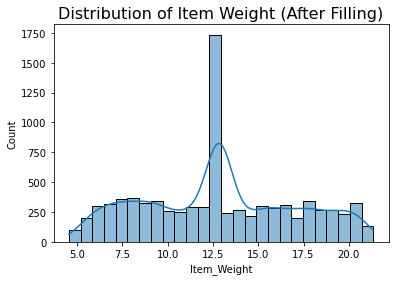

In [7]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
sns.histplot(df['Item_Weight'],kde=True)
plt.title('Distribution of Item Weight (After Filling)', fontsize=16)

Text(0.5, 1.0, 'distribution of Outlet Size (After Filling)')

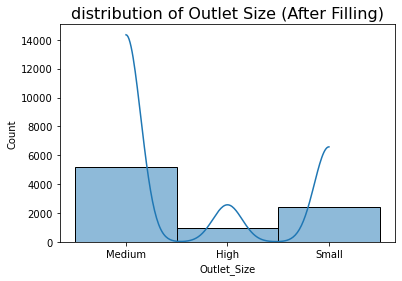

In [9]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
sns.histplot(df["Outlet_Size"].dropna(),kde=True)
plt.title("distribution of Outlet Size (After Filling)", fontsize=16)

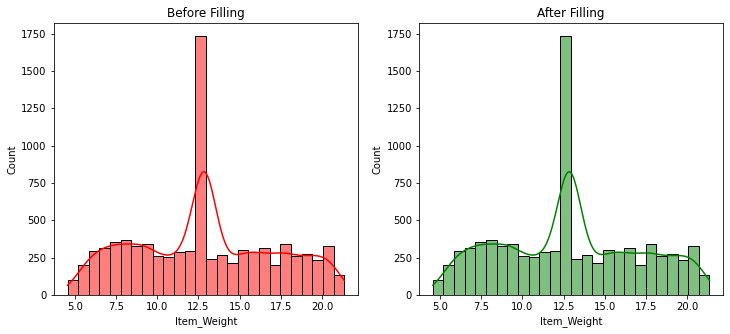

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before filling
sns.histplot(df['Item_Weight'].dropna(), kde=True, ax=axes[0], color='red')
axes[0].set_title('Before Filling')

# Fill missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# After filling
sns.histplot(df['Item_Weight'], kde=True, ax=axes[1], color='green')
axes[1].set_title('After Filling')

plt.show()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
df["Outlet_Size"].unique()
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

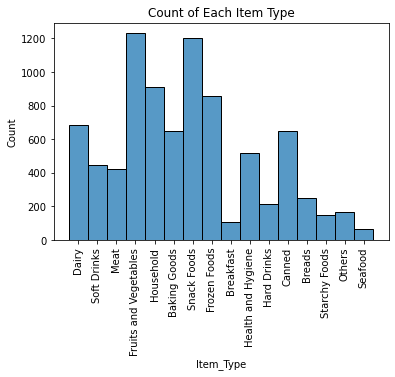

In [47]:
sns.histplot(data=df, x='Item_Type')
plt.xticks(rotation=90)
plt.title('Count of Each Item Type')
plt.show()

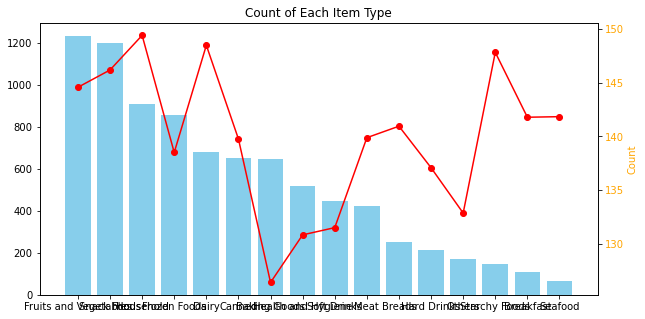

In [28]:
import matplotlib.pyplot as plt

counts = df["Item_Type"].value_counts()

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(counts.index, counts.values, color='skyblue')
mean_prices = df.groupby("Item_Type")["Item_MRP"].mean()
mean_prices = mean_prices[counts.index]
ax2 = ax1.twinx() #to print two graph in same
ax2.plot(mean_prices.index, mean_prices.values, color='red', marker='o', label='Mean Price')
ax2.set_ylabel("Mean MRP", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.xticks(rotation=90)
plt.title("Count of Each Item Type")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.show()
